### Logistic Regression - Bus Network Delay
#### Achilles Edwin Alfred Saxby

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

trip_survey = pd.read_csv('bus_network_data.csv', index_col=0, low_memory=False)

import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
trip_survey.head()

,bus_line,direction,date,month,day,day_of_week,time_period,hour,minute,trip_time,...,Humidity,PrecipitationIn,TemperatureF,VisibilityMPH,Wind SpeedMPH,totalInjuries,pavementScore,potholeCount,prev_trip_ratio,ntwk_delay_lag1hr
0,B11,2.0,2016-01-01,1,1,Friday,PeakAM,9,44,38.450000,...,58.0,0.0,39.9,10.0,10.4,162,2110.0,237,0.638492,2.0
1,B11,1.0,2016-01-01,1,1,Friday,PeakAM,9,52,53.900000,...,58.0,0.0,39.9,10.0,10.4,162,2110.0,237,1.055520,2.0
2,B11,2.0,2016-01-01,1,1,Friday,MidDay,10,10,34.700000,...,58.0,0.0,39.9,10.0,6.9,162,2110.0,237,1.017161,4.0
3,B11,1.0,2016-01-01,1,1,Friday,MidDay,10,23,41.050000,...,58.0,0.0,39.9,10.0,6.9,162,2110.0,237,0.979406,4.0
4,B11,2.0,2016-01-01,1,1,Friday,MidDay,10,33,40.183333,...,58.0,0.0,39.9,10.0,6.9,162,2110.0,237,0.591185,4.0


In [3]:
trip_survey.columns

Index([u'bus_line', u'direction', u'date', u'month', u'day', u'day_of_week',
       u'time_period', u'hour', u'minute', u'trip_time', u'avg_trip_time',
       u'std_trip_time', u'delay_time', u'delay', u'Conditions', u'Humidity',
       u'PrecipitationIn', u'TemperatureF', u'VisibilityMPH', u'Wind SpeedMPH',
       u'totalInjuries', u'pavementScore', u'potholeCount', u'prev_trip_ratio',
       u'ntwk_delay_lag1hr'],
      dtype='object')

In [7]:
trip_survey.delay.unique()

array(['on-time', 'early', 'significant delay', 'delay'], dtype=object)

In [18]:
trip_survey.reset_index(inplace=True, drop=True)

In [19]:
for i in xrange(len(trip_survey)):
    if ((trip_survey.delay[i] == 'delay') | (trip_survey.delay[i] == 'significant delay')):
        trip_survey.loc[i, 'Delay'] = 1 
    else:
        trip_survey.loc[i, 'Delay'] = 0

### Binomial Logistic Regression

- Taking 'Delay' as a Binomial Logistic Regression Factor
    - 0 if Early or Significantly Early
    - 1 if Delay or Significantly Delay

In [33]:
X_B = trip_survey[[u'bus_line', u'direction', u'date', u'month', u'day', u'day_of_week', 
                   u'time_period', u'hour', u'minute', u'Conditions', u'Humidity', u'PrecipitationIn', u'TemperatureF', 
                   u'VisibilityMPH', u'Wind SpeedMPH', u'totalInjuries', u'pavementScore', u'potholeCount', 
                   u'prev_trip_ratio', u'ntwk_delay_lag1hr']]
Y_B = trip_survey['Delay']

In [34]:
X_train_B, X_test_B, Y_train_B, Y_test_B = train_test_split(X_B, Y_B, test_size=0.33, random_state=123)

In [35]:
X_train_dummies_B = pd.get_dummies(X_train_B)

In [36]:
X_test_dummies_B = pd.get_dummies(X_test_B)

In [37]:
X_train_dummies_B.shape

(526248, 440)

In [38]:
X_test_dummies_B.shape

(259198, 440)

In [39]:
Y_train_B.shape

(526248,)

In [40]:
Y_test_B.shape

(259198,)

In [41]:
logit_B = LogisticRegression(C=1e5)

In [42]:
logit_B.fit(X_train_dummies_B, Y_train_B)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [43]:
logit_B.score(X_test_dummies_B, Y_test_B)

0.69346599896604144

In [44]:
# Cross validate using best C parameter
avg_acc_B = []
for i in range(10):
    X_train_B, X_test_B, Y_train_B, Y_test_B = train_test_split(X_B, Y_B, test_size=0.33, random_state=i) 
    #Use random_state to fix samples
    X_train_dummies_B = pd.get_dummies(X_train_B)
    X_test_dummies_B = pd.get_dummies(X_test_B)

    clf_B = LogisticRegression(C=1e5) 
    clf_B.fit(X_train_dummies_B, Y_train_B)

    avg_acc_B.append(1.0*(clf_B.predict(X_test_dummies_B)==np.asarray(Y_test_B)).sum()/len(Y_test_B))

print avg_acc_B

[0.6938518044120711, 0.6945848347595275, 0.6953448714882059, 0.6950092207501601, 0.6956920963896326, 0.6930416129754088, 0.6945925508684481, 0.6945809767050671, 0.6948471824628276, 0.6953101489980632]


In [45]:
print ("Successfully (OS) predict {}% of the modes".format(np.mean(avg_acc_B)*100))

Successfully (OS) predict 69.4685529981% of the modes


### Feature Selection - 1

#### Average Trip Time and Standard Deviation Trip - They are both values related to time here and are highly correlated with the original trip time column. Leaving these two variables out seems to be the right choice here.

#### Date as well, since we are only looking at One Year of data - looking at the dates does not seem to matter much when we are trying to find relationships between variables here.

#### Features Dropped:
- Date
- Month
- Day
- Hour
- Minute
- Delay Time
- Trip Time
- Average Trip Time
- Std Trip Time
- PrecipitationIn
- Wind Speed - Does not really matter when a bus is on the road (personal judgement)

In [4]:
X = trip_survey[['bus_line', 'direction', 'day_of_week', 'time_period','Conditions', 
                 'TemperatureF', 'VisibilityMPH', 'Humidity', 'totalInjuries', 'pavementScore', 
                 'potholeCount', 'prev_trip_ratio', 'ntwk_delay_lag1hr']]
Y = trip_survey['delay']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=123)

In [6]:
X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

In [7]:
X_train_dummies.shape

(526248, 46)

In [8]:
X_test_dummies.shape

(259198, 46)

In [9]:
Y_train.shape

(526248,)

In [10]:
Y_test.shape

(259198,)

In [11]:
logit = LogisticRegression(C=1e5)

In [12]:
logit.fit(X_train_dummies, Y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [13]:
logit.score(X_test_dummies, Y_test)

0.40404632751795927

In [14]:
avg_acc = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=i) #Use random_state to fix samples
    X_train_dummies = pd.get_dummies(X_train)
    X_test_dummies = pd.get_dummies(X_test)

    clf = LogisticRegression(C=1e5) 
    clf.fit(X_train_dummies, Y_train)

    avg_acc.append(1.0*(clf.predict(X_test_dummies)==np.asarray(Y_test)).sum()/len(Y_test))

print avg_acc

[0.4046867645583685, 0.4029969367047585, 0.4070826163782128, 0.4032670005169793, 0.40737968657165563, 0.40538121436122193, 0.4023217771742066, 0.4038457086860238, 0.4077269114730824, 0.402418228535714]


In [15]:
print ("Successfully (OS) predict {}% of the modes".format(np.mean(avg_acc)*100))

Successfully (OS) predict 40.4710684496% of the modes


### Feature Selection - 2
#### Features Dropped:
- Date
- Month
- Day
- Hour
- Minute
- Delay Time
- Average Trip Time
- Std Trip Time
- Trip Time

In [16]:
X_1 = trip_survey[[u'bus_line', u'direction', u'day_of_week', u'time_period', 
                   u'Conditions', u'Humidity', u'PrecipitationIn', u'TemperatureF', 
                   u'VisibilityMPH', u'Wind SpeedMPH', u'totalInjuries', u'pavementScore', 
                   u'potholeCount', u'prev_trip_ratio', u'ntwk_delay_lag1hr']]
Y_1 = trip_survey['delay']

In [17]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size=0.33, random_state=123)

In [18]:
X_train_dummies_1 = pd.get_dummies(X_train_1)

In [19]:
X_test_dummies_1 = pd.get_dummies(X_test_1)

In [20]:
X_train_dummies_1.shape

(526248, 70)

In [21]:
X_test_dummies_1.shape

(259198, 70)

In [22]:
Y_train_1.shape

(526248,)

In [23]:
Y_test_1.shape

(259198,)

In [24]:
logit_1 = LogisticRegression(C=1e5)

In [25]:
logit_1.fit(X_train_dummies_1, Y_train_1)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
logit_1.score(X_test_dummies_1, Y_test_1)

0.40490281560814512

In [27]:
# Cross validate using best C parameter
avg_acc_1 = []
for i in range(10):
    X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size=0.33, random_state=i) 
    #Use random_state to fix samples
    X_train_dummies_1 = pd.get_dummies(X_train_1)
    X_test_dummies_1 = pd.get_dummies(X_test_1)

    clf_1 = LogisticRegression(C=1e5) 
    clf_1.fit(X_train_dummies_1, Y_train_1)

    avg_acc_1.append(1.0*(clf_1.predict(X_test_dummies_1)==np.asarray(Y_test_1)).sum()/len(Y_test_1))

print avg_acc_1

[0.4073179577002909, 0.4050609958410173, 0.40387657312170616, 0.4066775206598816, 0.40414663693392694, 0.40585575505983845, 0.4058403228419972, 0.4051651633114453, 0.4041967916419108, 0.4063264377039946]


In [28]:
print ("Successfully (OS) predict {}% of the modes".format(np.mean(avg_acc_1)*100))

Successfully (OS) predict 40.5446415482% of the modes


### Feature Selection - 3
#### Features Dropped:

- Delay Time
- Trip Time
- Average Trip Time
- STD Trip Time

#### Feature Taken:

- All Features

In [29]:
X_2 = trip_survey[[u'bus_line', u'direction', u'date', u'month', u'day', u'day_of_week', 
                   u'time_period', u'hour', u'minute', u'Conditions', u'Humidity', u'PrecipitationIn', u'TemperatureF', 
                   u'VisibilityMPH', u'Wind SpeedMPH', u'totalInjuries', u'pavementScore', u'potholeCount', 
                   u'prev_trip_ratio', u'ntwk_delay_lag1hr']]
Y_2 = trip_survey['delay']

In [30]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.33, random_state=123)

In [31]:
X_train_dummies_2 = pd.get_dummies(X_train_2)

In [32]:
X_test_dummies_2 = pd.get_dummies(X_test_2)

In [33]:
X_train_dummies_2.shape

(526248, 440)

In [34]:
X_test_dummies_2.shape

(259198, 440)

In [35]:
Y_train_2.shape

(526248,)

In [36]:
Y_test_2.shape

(259198,)

In [37]:
logit_2 = LogisticRegression(C=1e5)

In [38]:
logit_2.fit(X_train_dummies_2, Y_train_2)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [39]:
logit_2.score(X_test_dummies_2, Y_test_2)

0.42129954706440637

In [40]:
# Cross validate using best C parameter
avg_acc_2 = []
for i in range(10):
    X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.33, random_state=i) 
    #Use random_state to fix samples
    X_train_dummies_2 = pd.get_dummies(X_train_2)
    X_test_dummies_2 = pd.get_dummies(X_test_2)

    clf_2 = LogisticRegression(C=1e5) 
    clf_2.fit(X_train_dummies_2, Y_train_2)

    avg_acc_2.append(1.0*(clf_2.predict(X_test_dummies_2)==np.asarray(Y_test_2)).sum()/len(Y_test_2))

print avg_acc_2

[0.4217007847282772, 0.4228003302494618, 0.42367610861194915, 0.4216930686193566, 0.42299323297247665, 0.42100247687096354, 0.4217007847282772, 0.42123010208412104, 0.4239847529687729, 0.42251869227386013]


In [41]:
print ("Successfully (OS) predict {}% of the modes".format(np.mean(avg_acc_2)*100))

Successfully (OS) predict 42.2330033411% of the modes


#### Binomial Confusion Matrix

In [47]:
y_pred = clf_B.predict(X_test_dummies_B)

Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.72  0.28]]


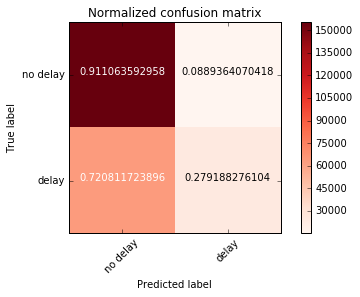

In [50]:
import itertools
from sklearn.metrics import confusion_matrix


class_names = ['no delay', 'delay']
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_B, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()